# Exploratory data analysis

In [65]:
# others libraries
import pandas as pd
import json
from string import punctuation

# NLTK and Stanford libraries
import nltk, re, os
from nltk.corpus import stopwords, state_union
from nltk.tokenize import sent_tokenize, word_tokenize, PunktSentenceTokenizer
from nltk.probability import FreqDist
from nltk.tag.stanford import StanfordNERTagger
from nltk import ne_chunk, pos_tag
from nltk.tree import Tree
from nltk import RegexpParser
from nltk.chunk.api import ChunkParserI

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = 'Set2', )
%matplotlib inline

# Words Analysis

In [2]:
text = """Hello, you have called Virtual bank, this is Nancy speaking. How may I help you?
Oh, I just had withdrawn some cash from the ATM machine and ATM transaction failed but money got debited. Can you fix this problem?
Sure. What is your account number?
It is 111236669.
Just a moment …. Okay and what is your name ma’am?
My name is Sandra Reed.
Okay, Miss Reed. Can I have your identify number?
Okay. 5589766523663.
Okay. I have 5589766523663.
Correct.
Where is the ATM machine that you had withdrawn the cash?
I do not know where exactly it is, but it is in the Pattaya beach.
That is fine, we will check your withdrawal transaction and we will refund the money to your account. Do you want to receive the message when we refunding the money?
Yes, please.
Okay, what is your phone number ma’am?
8779526987.
Okay, I have 8779526987. We will send the message when we refund the money to your account.
Thanks, Nancy.
Have a good day ma’am. Thank you.
Hello, you have called Virtual bank, this is Linda speaking. How may I help you?
Hi Linda. I was just at your Ville branch and I think I left my Debit card in the ATM machine.
Okay. Do you have your Debit card number?
I don’t have.
Okay, well do you have the checking account number associated with the Debit
card? 
That I do have. Are you ready? I will give you what I have got. 765456789. 
Okay. That’s 765456789.
Correct.
What is your identification number?
7745896589665.
Okay, I have 7745896589665 and what is your name sir? 
It is Robert Applebaum.
Okay. I have Robert Applebaum.
Yes.
And what is your date of birth Mr. Applebaum?
July 7th, 1974. 
Okay. July 7th, 1974.
Yes.
And your phone number?
It is 6102651715. 
Okay. I have 6102651715.
Yes.
Okay Mr. Applebaum. I have just suspended your card. If it is in the machine, we will contact you and lift the suspension. 
Oh, thank you.
Sure. Thank you.  
Conversation: 3
Hello, you have called Virtual bank, this is Nancy speaking. How may I help you?
Hi. I am a customer of your bank and I have some errors on my account details.
What type of errors?
Well, I just checked the address on my book bank and my address is wrong, it shows my old address and only reached me because of a redirect.
Okay, I can fix that for you, could I have your identification number?
32948322898.
Okay, 32948322898. And What is your name sir?
Lucifer Clarkson. 
Okay. Mr. Clarkson. What is your date of birth?
January 1st, 1975.
Okay, now let's go ahead and fix your details. What is your new address, sir?
123 Oxford Street, London.
Okay, 123 Oxford Street, London. Is that correct?
Yes, Nancy.
Okay I have replaced your address. Would you like another service sir?
No, that’s all. Thanks.
Thank you. Have a good day sir.
You too.
Goodbye.
Hello, you have called Virtual bank, this is Helen speaking. How may I help you?
Hi Helen. I think I have lost my Debit card.
Okay. Do you have your Debit card number?
Oh yes, I used to take a picture of my card, wait a minute ......... Okay, that is 8574562111234522.
Sorry, can you repeat your Debit card number again please?
Sure, it is 8574562111234522.
Okay. That is 8574562111234522.
That’s right.
What is your identification number?
1145824598874.
Okay, I have 1145824598874. And what is your name ma’am?
Laura. My name is Laura Brown.
Okay. I have Laura Brown.
Yes.
Do you want me to permanent suspend your card ma’am?
Yes, please. 
Okay, and your ledger balance in the account is $256,887.69, is that correct?
Yes.
Okay, I just permanent suspended your card. Thank you for using our service. Have a good day ma’am.
Thanks, bye.
Goodbye.
Hello, you have called Virtual bank, this is Linda speaking. How may I help you?
Hello Linda. I would like to merge my wife’s account with mine.
Okay sir. Can I have your account number?
Wait a second …… Okay, it is 554874521.
554874521. Okay, And your name sir?
I am Caleb Evan.
Okay and Can I have your identification number?
Sure. That is 5587485574996.
Okay, your information is correct. What’s your wife’s identification number?
Oh, sorry I have forgot. Please wait …... Okay here is my wife’s identification number 1140254585556. Her name is Susan White.
What is your wife’s account number?
888985777.
Okay. I have 888985777.
Yes.
I just merged your wife’s account with you. Would you like another service sir?
That is all Thank you.
Thank you, goodbye.
Hello, you have called Virtual bank, this is Nancy speaking. How may I help you?
I would like to cancel the automatic deduction order.
What kind of the automatic deduction order sir?
SMS banking charge.
Okay, could you tell me your account number?
999747885.
Okay, I have 999747885. What is your identification number?
1102500214660.
Please wait for a moment … Okay, and what is your name sir?
Gabriel Parker.
Okay Mr. Parker, and what is your phone number sir?
0003659698.
Okay, I just canceled the SMS banking charge for you. Would you like another service sir?
No, thank you.
Have a good day sir, Thank you.
Hello, you have called Virtual bank, this is Sarah speaking. How may I help you?
Hello. I would like to close my account.
Sorry sir. Our service call center could not close the account for customer. You have to go to the branch nearby you and you can close your account.
Oh, sorry I do not know. Could you check for the bank branch that nearby me?
Sure, what is your address sir?
132, Houston Street, New York.
Please wait for a moment sir.
Okay.
You can go to the Houston Street branch. There is nearest to your address.
Thank you. Sorry can I ask you a question?
Sure sir, you can ask me anything.
How long does it take if I close my account at the bank?
About 15 minutes.
Okay, thanks a lot.
Would you like another service sir?
No, that is all. Thank you very much.
Okay. Have a good day sir.
You too. Bye.
Goodbye, sir.
Hello, you have called Virtual bank, this is Maria speaking. How may I help you?
Hello Maria. I have forgotten my banking application password. What should I do?
You have to press on forgot password button on the application screen and we will send you a security number to your phone number.
Oh, that is bad. I did not use my old phone number anymore but I have not changed my details in the bank information.
That is fine. Could I have your account number?
That is 111544222.
Okay, and what is your identification number?
My identification number is 1102569854112.
Okay, I have 1102569854112.
Yes, that is right.
And what is your name ma’am?
My name is Amanda Nelson.
Okay, Ms. Nelson. What is your phone number ma’am?
My phone number is 7719855587.
I just replaced your phone number and you can reset your password in the application by press on the forgot password and we will send you a security number to your phone.
Thank you.
Thank you for using our service Miss Nelson. Have a good day.
Hello, you have called Virtual bank, this is Helen speaking. How may I help you?
Hi Helen. I think I have lost my account book. I could not find it. What can I do about this?
Okay first, could you tell me your name sir?
I am Michael Myers.
Okay, Mr. Myers. In this case you have to go to the bank nearby you and give your identification card to the bank officer. They will mange about your account book.
Oh, Okay I will go to the bank tomorrow. Thank you, Helen.
Thank you for using our service. Have a good day sir.
Hello, you have called Virtual bank, this is Debra speaking. How may I help you?
Hi Debra. I have lost my bank card.
Okay. Do you have your card number?
Actually. I don’t have it.
Okay, then what is your identification number?
1200277874441.
Okay, I have 1200277874441. What is your name?
Laura Velazquez.
Okay. I have Laura Velazquez.
Yes, that is right.
Would you like to permanent suspend your card ma’am?
Sure, that is why I call you.
Your ledger balance in the account is $5,477,874.66, is that correct?
Correctly.
Okay, I just permanent suspended your card. Thank you for using our service. Have a good day ma’am.
Thank you.
Goodbye.
Hello, you have called Virtual bank, this is Debra speaking. How may I help you?
Hello Debra. I would like to tell you about a change of address.
What is your name ma’am?
I am Anna Noel.
Okay, Ms. Noel. And could I have your identification number?
It is 4415985478996.
Sorry Ms. Noel, could you tell your identification number again please?
Oh, sorry I will speak slowly. It is 4415985478996.
Okay, I have 4415985478996. Is that correct?
Exactly.
And what is your phone number Ms. Noel?
8879446640.
Okay, so what is your new address ma’am?
It is 748, Rose Street. Boston, New York.
748, Rose Street. Boston, New York. Is that right?
Yes.
Please wait for a moment …. Okay I just replaced your address. Would you like another service ma’am?
Yes, I would like to apply the bank application but I do not know what to do.
You can apply at the ATM machine nearby.
Oh, okay that is all I would like to know. Thanks.
Have a good day, thank you.
Hello, you have called Virtual bank, this is Helen speaking. How may I help you?
Hi, I would like a debit card with an insurance and I would like to know about the details.
Okay, what is your name sir?
My name is Kevin Vann.
Okay, Mr. Vann. What kind of insurance would you like?
I think I would like life insurance and health insurance.
Okay, let me check on the system. Please wait …. Okay, we have 3 kinds of debit card. The first is debit card with life insurance the cost to make this card is 10 dollars, the second is debit card with health insurance the cost is 10 dollars, and the last one is both of life insurance and health insurance, the cost is 25 dollars. If you would like to know about the details of the cards, you have to go to the bank and ask the bank officers. They will help you about this.
Okay, thank you very much Helen. You are so helpful.
Would you like another service Mr. Vann?
No, I am good. Goodbye.
Thanks for using our service. Have a good day.
Hello, you have called Virtual bank, this is Marie speaking. How may I help you?
Hey Marie, could you tell me my balance, please? I do not have bank application.
What is your name sir?
I am Travis Scott.
Could I have your identification number Mr. Scott?
Sure. It is 8878998589999.
Okay, I have 8878998589999.
Correct!
And what is your account number sir?
888774888.
Okay. 888774888 it is.
And my account balance is?
Your account balance is $10,541,887.9. Would you like another service sir?
No, thanks Marie.
Thank you for using our service. Have a good day.
Hello, you have called Virtual bank, this is Nancy speaking. How may I help you?
I had withdrawn some cash from the ATM machine and they debited but I did not receive the money.
Okay, what is your account number?
It is 222555333.
Just a moment …. Okay and what is your name ma’am?
My name is Michael Wooten.
Okay, Miss Wooten. Can I have your identify number?
It is 7447488888775.
Okay. I have 7447488888775 and where is the ATM machine that you had withdrawn the cash?
Lotus Bangkapi.
Okay, we will check your withdrawal transaction and we will refund the money to your account. Do you want to receive the message when we refunding the money?
Yes, please.
Okay, what is your phone number?
8889996666.
Okay, we will send the message when we refund the money to your account.
Thank you very much.
Have a good day. Thank you.
Hello, you have called Virtual bank, this is Linda speaking. How may I help you?
Hey Linda. I would like to merge my husband’s account with mine.
Okay, can I have your account number?
Sure, it is 544777888.
Okay, I have 544777888. And what is your name ma’am?
Ashly McMahon.
Okay, I have Ashly McMahon. Can I have your identification number?
That is 7741499999859.
Your information is correct. What is your husband’s identification number?
My husband’s identification number is 5555596841669.
Mr. Troy McMahon. Is that right?
Right.
What is your husband’s account number?
512965663.
Okay. I have 512965663. Please wait. 
Okay.
I just merged your husband’s account with you. Would you like another service ma’am?
No, thank you.
Thank you for using our service. Have a good day ma’am.
Hello, you have called Virtual bank, this is Marie speaking. How may I help you?
Hi, I would like to know about a debit card with an insurance.
Okay, what is your name sir?
My name is Tyler Valentine.
Okay, Mr. Valentine. What kind of insurance would you like?
I would like accident insurance, please.
Okay, let me check on the system. Please wait …. Okay, the debit card with accident insurance is about 10 dollars and if you would like to know more about the details of the card, you have to go to the bank and ask the bank officers. They will help you about this.
Okay, thank you. Bye.
Thank you for using our service. Have a good day.
Hello, you have called Virtual bank, this is Helen speaking. How may I help you?
Hi Helen. I think I have lost my Debit card.
Okay. Do you have your Debit card number?
It is 7452562111234522.
Okay. That is 7452562111234522.
That is right.
What is your identification number?
1145824598888.
Okay, I have 1145824598888. And what is your name ma’am?
Alice Monet.
Okay. Miss Monet.
Yes.
Do you want me to permanent suspend your card ma’am?
Of course. 
Okay, and your ledger balance in the account is $7,000.25, is that correct?
Yes.
Okay, I just permanent suspended your card. Thank you for using our service. Have a good day ma’am.
Thank you very much. 
Conversation: 18
Hello, you have called Virtual bank, this is Helen speaking. How may I help you?
Hi Helen. I want to report a lost credit card.
Okay. Do you have your Debit card number?
Oh yes, that is 8574562111234522.
Okay. That is 8574562111234522.
Yes.
What is your identification number?
1145824598874.
Okay, I have 1145824598874. And what is your name sir?
My name is Sakai Jinn.
Okay. Do you want me to permanent suspend your card sir?
Yes, please. 
Okay, and your ledger balance in the account is $56,000, is that correct?
Yes.
Okay, I just permanent suspended your card. Thank you for using our service. Have a good day sir.
Thank you.
Hello, you have called Virtual bank, this is Sarah speaking. How may I help you?
Hey, Sarah. I would like to refund my money back.
Could you tell me why you want to refund your money?
I bought something at the shop with my debit card and it debited my money twice.
Okay, what is your name ma’am?
My name is Amy Adams.
Okay, and where did you use the debit card to buy something miss Adams?
I bought a bag at Queens Place Mall. It costs $80.
We are so sorry. In this case we could not refund your money back. You have to talk with the store that you bought and they will manage this.
Oh, really? I do not even know.
Yes, ma’am. We are so sorry but we could not fix this problem. The store handles about this.
Okay, never mind. Thanks.
Would you like another service?
That is all. Thanks.
Thank you for using our service. Have a good day.
Hello, you have called Virtual bank, this is Debra speaking. How may I help you?
Hello Debra. I would like to change my phone number.
What is your name ma’am?
Stephanie Bolton.
Okay, Miss Bolton. And could I have your identification number?
8544702415996.
Okay, I have 8544702415996. Is that correct?
Correct.
And what is your account number?
That is 874525400.
Okay, so what is your new phone number?
6657854521.
Please wait for a moment …. Okay I just replaced your phone number. Would you like another service ma’am?
No, Thank you.
Have a good day, thank you.
Hello, you have called Virtual bank, this is Anna speaking. How may I help you?
Good morning Anna. I would like to ask about open a bank account.
Sure thing. What kind of account would you like to open? A savings account or a checking account?
What's the difference?
A checking account is designed to use for everyday transactions. Yet; the money in a savings account is meant to stay in the account and earn interest over time.
I see, actually I want to apply for a credit card. That's why I need an account.
Okay then, you probably want a checking account.
Well, thank you. I'd like that.
Sure, what’s your name ma’am?
I’m Angelina Jolie.
How much of a credit limit were you looking for, Miss Jolie?
I would like a $10,000 spending limit. 
Alright, we will see what we can do. We might be able to get you one of our gold cards with a $10,000 spending limit.
Wonderful. Will I also collect points when I use the card?
Sure, with our gold card you will get 10 reward points for every dollar spent.
Perfect, and how much deposit minimum into the account?
You just need to deposit a minimum of $250 into your new checking account.
Very well, thank you for your help, have a good day.
Thank you ma’am, you too.
Hello, you have called Virtual bank, this is Anna speaking. How may I help you?
Hi Anna. What's the exchange rate of RMB to US dollar today?
6.28 yuan to the US dollar madam.
It's the same as last week.
That's right. The exchange rate here has been quite stable though it's subject to alteration.
I know, so If I want to change 1000 US dollars, that will be 6280 yuan. Is that right?
Yes madam.
Okay, Thank you very much.
Would you like another service?
No, thank you.
Okay, thanks for using our service madam.
Hello, you have called Virtual bank, this is Anna speaking. How may I help you?
Yes, I want to know my balance.
Please speak one more time.
Okay, I want to know my balance.
I see, could I have your account number?
Well, it’s 452698477.
And what’s your name sir?
I’m Stephen Hawking.
Okay, Mr. Hawking, and what’s your identification number?
It’s 5547896632004.
Please wait a second, Your balance at the bank is $5,000 sir.
Okay, thanks.
Would you like another service sir?
On I’m good, thank you very much.
Thank you. Have a good day."""

In [46]:
# Data cleaning
def clean_text(text):
    # replace . and a space with only a space, then make all words lower case.
    text = text.replace(".", " ").replace(",", "").replace("\'", "").replace("’", "")
    # get rid of the . at the end of each line. 
    cleaned_text = re.sub("\.$","", text)
    
    return cleaned_text

In [47]:
stopwords_nltk_en = set(stopwords.words('english'))
stopwords_punct = set(punctuation)
stoplist_combined = set.union(stopwords_nltk_en, stopwords_punct)
print('Stoplist that has to remove: ', stoplist_combined)

Stoplist that has to remove:  {'will', 'hasn', "needn't", ':', '!', 'here', "wouldn't", 'not', "doesn't", 'once', 'the', 'to', 'y', 'these', 'all', '$', 'are', "mightn't", 'why', 'yourselves', 'me', 'after', 'hadn', 'each', 'wouldn', 'weren', 'until', 'in', "isn't", 'against', "'", 'did', 'your', 'up', '?', 'if', "you'll", 'on', 'her', 'our', 'them', 'themselves', 'some', 'should', '-', 'having', '%', 'no', '^', '<', '}', 'be', 'yours', '+', 'own', ']', 'over', "mustn't", "hadn't", 'through', '#', '(', 'doing', '[', "won't", 'shan', 're', 'you', 'now', 'couldn', 'same', '|', 'nor', 'any', '@', ',', 'which', 'or', '>', 'other', 'll', '&', 'isn', 'too', "didn't", 'where', 'herself', 'mustn', 'were', "should've", 'ourselves', 'my', 'very', 'had', 'there', 'both', 'that', 'most', '=', 'hers', 'under', '_', 'how', 'about', 'can', 'i', 'was', 'only', 'and', 'didn', ')', 'ours', 'aren', 'haven', 'she', 'whom', 'such', 'ain', 'do', 'during', '`', 'does', 'wasn', 'being', 'off', 'then', "wasn't

In [48]:
tokenized_lower = list(map(str.lower, word_tokenize(clean_text(text))))

In [49]:
filtered_sent = []

for w in tokenized_lower:
    if w not in stoplist_combined:
        filtered_sent.append(w)

In [50]:
print('Total words amount:', len(word_tokenize(text)))
print('Average words in one conversation: %.2f' % (len(word_tokenize(text)) / 23))
print('\nWords amount after remove punctuation and stop words: ', len(filtered_sent))
print('Average words in one conversation after remove punctuation and stop words: %.2f' % (len(filtered_sent) / 23))

Total words amount: 4095
Average words in one conversation: 178.04

Words amount after remove punctuation and stop words:  1732
Average words in one conversation after remove punctuation and stop words: 75.30


***

In [51]:
# Distinct words
fdist = FreqDist(filtered_sent)
print(fdist)

<FreqDist with 385 samples and 1732 outcomes>


In [52]:
for i in filtered_sent:
    fdist[i] += 1
fdist

FreqDist({'okay': 214, 'number': 110, 'account': 88, 'bank': 80, 'thank': 80, 'card': 72, 'like': 70, 'would': 68, 'sir': 66, 'name': 60, ...})

## Word Frequencies of All Conversations

In [53]:
print('\n--------------------------Original Text-------------------------\n')
print('Total words amount:', len(word_tokenize(text)))
print('Amount of distinct words: ' , len(word_tokenize(text)), '\n')
print('--------------------------Cleaned Text--------------------------\n')
print('Words amount after remove punctuation and stop words: ', len(filtered_sent))
print('Amount of distinct words: ' , len(fdist))
print('\n----------------------------------------------------------------\n')


--------------------------Original Text-------------------------

Total words amount: 4095
Amount of distinct words:  4095 

--------------------------Cleaned Text--------------------------

Words amount after remove punctuation and stop words:  1732
Amount of distinct words:  385

----------------------------------------------------------------



In [54]:
fdist.most_common(25)

[('okay', 214),
 ('number', 110),
 ('account', 88),
 ('bank', 80),
 ('thank', 80),
 ('card', 72),
 ('like', 70),
 ('would', 68),
 ('sir', 66),
 ('name', 60),
 ('hello', 56),
 ('help', 52),
 ('maam', 52),
 ('service', 50),
 ('yes', 48),
 ('called', 46),
 ('virtual', 46),
 ('speaking', 46),
 ('may', 46),
 ('good', 46),
 ('identification', 42),
 ('day', 40),
 ('please', 36),
 ('debit', 34),
 ('could', 32)]

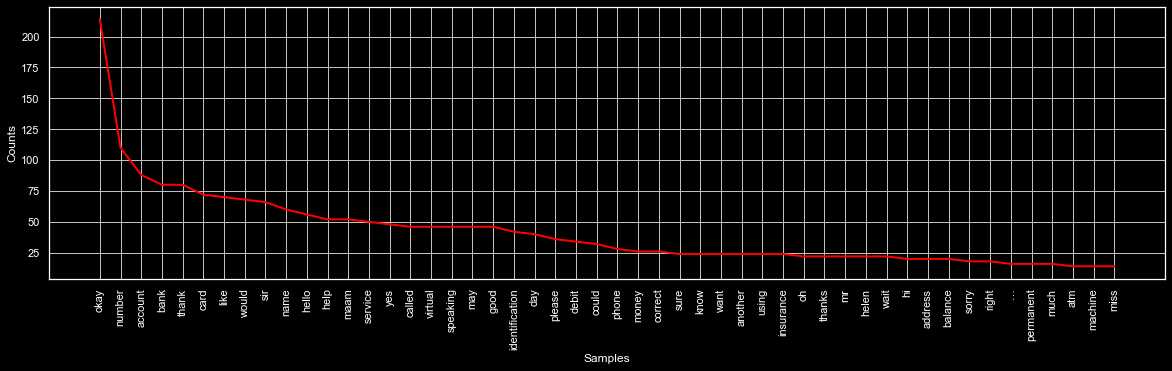

In [55]:
# Frequency Distribution Plot
plt.figure(figsize = (20, 5))
plt.style.use('dark_background')
fdist.plot(50, cumulative = False, color = 'red')
plt.show()

***

# Sentences Analysis
**Sentence segmentations of all conversations**

In [56]:
tokenized_sent_all = sent_tokenize(text)
len(tokenized_sent_all)

566

### Sentences Average number

In [57]:
print('Average Sentences = %.2f' % (len(tokenized_sent_all) / 23))

Average Sentences = 24.61


***

## Summarization

### Sentences Analysis

In [58]:
print('\n------------------------------------------- All Conversations -------------------------------------------\n')
print('Amount of all sentences: ' , len(tokenized_sent_all), 'sentences')
print('\n-------------------------------- Average Sentences per one conversation ---------------------------------\n')
print('Average Sentences:  %.2f' % (len(tokenized_sent_all) / 23), 'sentences')
print('\n---------------------------------------------------------------------------------------------------------\n')


------------------------------------------- All Conversations -------------------------------------------

Amount of all sentences:  566 sentences

-------------------------------- Average Sentences per one conversation ---------------------------------

Average Sentences:  24.61 sentences

---------------------------------------------------------------------------------------------------------



### Word analysis
* All words

In [59]:
print('\n--------------------------------------------- Original Text ---------------------------------------------\n')
print('Total words amount:', len(word_tokenize(text)), 'words')
print('Average words in one conversation: %.2f' % (len(word_tokenize(text)) / 23), 'words')
print('\n--------------------------------------------- Cleaned Text ----------------------------------------------\n')
print('Words amount after remove punctuation and stop words: ', len(filtered_sent), 'words')
print('Average words in one conversation after remove punctuation and stop words: %.2f' % (len(filtered_sent) / 23), 'words')
print('\n---------------------------------------------------------------------------------------------------------\n')


--------------------------------------------- Original Text ---------------------------------------------

Total words amount: 4095 words
Average words in one conversation: 178.04 words

--------------------------------------------- Cleaned Text ----------------------------------------------

Words amount after remove punctuation and stop words:  1732 words
Average words in one conversation after remove punctuation and stop words: 75.30 words

---------------------------------------------------------------------------------------------------------



* Distinct words

In [60]:
print('\n-------------------------------- Frequency Distribution of Original Text --------------------------------\n')
print('Amount of distinct words: ' , len(FreqDist(word_tokenize(text))), 'words')
print('\n-------------------------------- Frequency Distribution of Cleaned Text ---------------------------------\n')
print('Amount of distinct words: ' , len(fdist), 'words')
print('\n---------------------------------------------------------------------------------------------------------\n')


-------------------------------- Frequency Distribution of Original Text --------------------------------

Amount of distinct words:  510 words

-------------------------------- Frequency Distribution of Cleaned Text ---------------------------------

Amount of distinct words:  385 words

---------------------------------------------------------------------------------------------------------



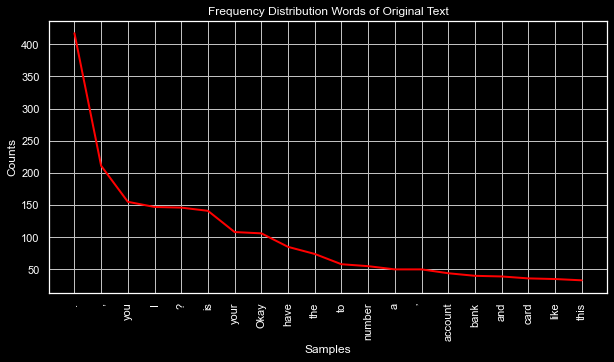

In [61]:
# Frequency Distribution Plot
plt.figure(figsize = (10, 5))
plt.style.use('dark_background')
FreqDist(word_tokenize(text)).plot(20, cumulative = False, color = 'red', title = "Frequency Distribution Words of Original Text")
plt.show()

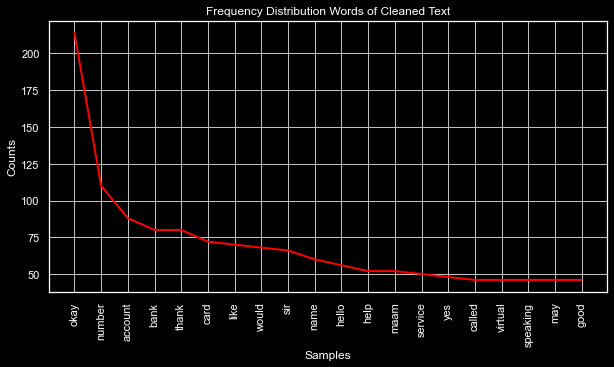

In [62]:
# Frequency Distribution Plot
plt.figure(figsize = (10, 5))
plt.style.use('dark_background')
fdist.plot(20, cumulative = False, color = 'red', title = "Frequency Distribution Words of Cleaned Text")
plt.show()

In [63]:
fdist.most_common(20)

[('okay', 214),
 ('number', 110),
 ('account', 88),
 ('bank', 80),
 ('thank', 80),
 ('card', 72),
 ('like', 70),
 ('would', 68),
 ('sir', 66),
 ('name', 60),
 ('hello', 56),
 ('help', 52),
 ('maam', 52),
 ('service', 50),
 ('yes', 48),
 ('called', 46),
 ('virtual', 46),
 ('speaking', 46),
 ('may', 46),
 ('good', 46)]

In [64]:
FreqDist(word_tokenize(text)).most_common(20)

[('.', 417),
 (',', 211),
 ('you', 155),
 ('I', 147),
 ('?', 146),
 ('is', 141),
 ('your', 108),
 ('Okay', 106),
 ('have', 85),
 ('the', 74),
 ('to', 58),
 ('number', 55),
 ('a', 50),
 ('’', 50),
 ('account', 44),
 ('bank', 40),
 ('and', 39),
 ('card', 36),
 ('like', 35),
 ('this', 33)]